# Set Up

In [140]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/HWK'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from HWK_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

fatal: destination path 'thesis' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Number of comments

## Facebook

In [87]:
facebook_news=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews.csv')
facebook_vaccines_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored.csv')
facebook_brexit_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

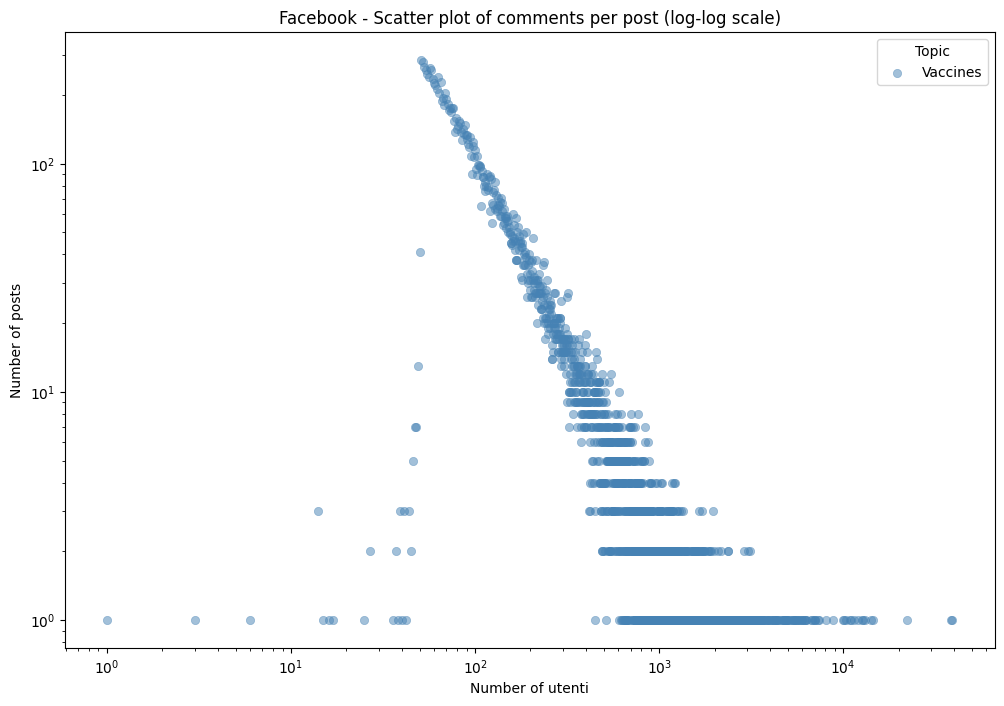

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola il numero di commenti per ogni post per i dati di vaccines
conversation_size_vaccines = fb.groupby(['post_id'])['user_id'].count().reset_index()
conversation_size_vaccines.columns = ['post_id', 'user_count']

# Conta quanti post hanno un determinato numero di commenti per i dati di vaccines
post_count_vaccines = conversation_size_vaccines.groupby('user_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di vaccines
sns.scatterplot(data=post_count_vaccines, x='user_count', y='post_count', alpha=0.5, label='Vaccines', color='steelblue', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Facebook - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of utenti')
plt.ylabel('Number of posts')

# Rimuovi la griglia
plt.grid(False)

plt.legend(title='Topic')
plt.show()


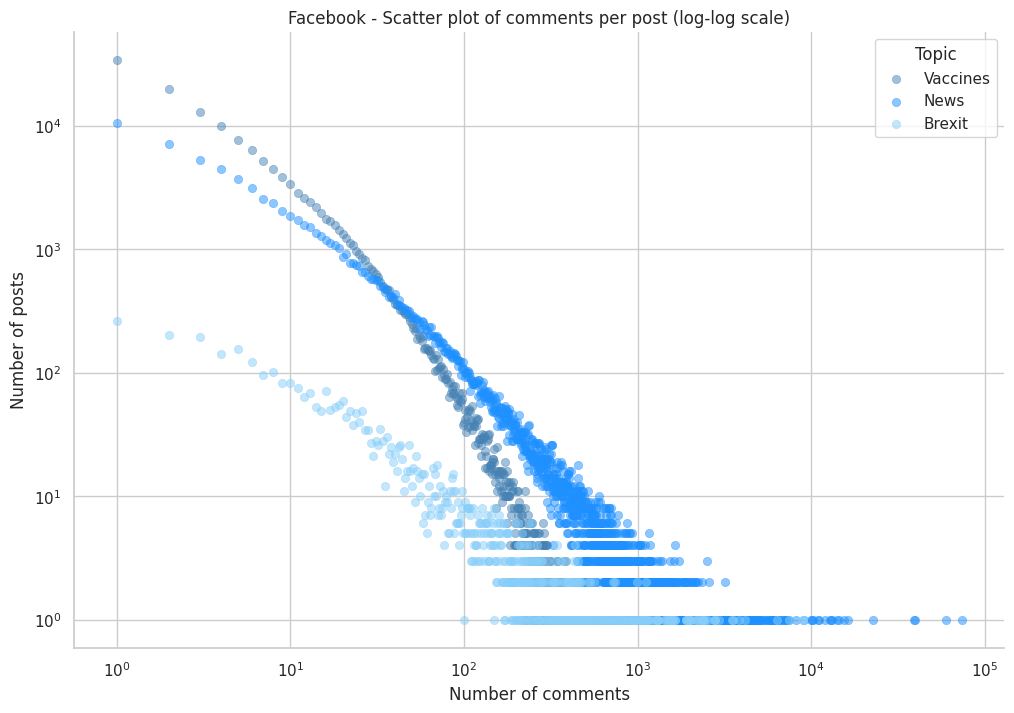

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola il numero di commenti per ogni post per i dati di vaccines
conversation_size_vaccines = facebook_vaccines_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_vaccines.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di news
conversation_size_news = facebook_news.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_news.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di brexit
conversation_size_brexit = facebook_brexit_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_brexit.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti per i dati di vaccines
post_count_vaccines = conversation_size_vaccines.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di news
post_count_news = conversation_size_news.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di brexit
post_count_brexit = conversation_size_brexit.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di vaccines
sns.scatterplot(data=post_count_vaccines, x='comment_count', y='post_count', alpha=0.5, label='Vaccines', color='steelblue', edgecolor=None)

# Scatter plot per i dati di news
sns.scatterplot(data=post_count_news, x='comment_count', y='post_count', alpha=0.5, label='News', color='dodgerblue', edgecolor=None)

# Scatter plot per i dati di brexit
sns.scatterplot(data=post_count_brexit, x='comment_count', y='post_count', alpha=0.5, label='Brexit', color='lightskyblue', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Facebook - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')

# Rimuovi la griglia
plt.grid(False)

plt.legend(title='Topic')
plt.show()


## Gab

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
gab = pd.read_parquet('/content/drive/MyDrive/thesis/data/gab/gab_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = gab.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyboardInterrupt: 

## Reddit

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
reddit = pd.read_parquet('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = reddit.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyError: 'Column not found: comment_id'

## YouTube

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
yt = pd.read_parquet('/content/drive/MyDrive/thesis/data/youtube/youtube_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = yt.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='red', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('YouTube - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


TypeError: read_table() got an unexpected keyword argument 'usecols'

# Model simulation

In [2]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fbb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_processed.csv')
yt=pd.read_csv('/content/drive/MyDrive/thesis/data/youtube/processed_sample.csv')

In [141]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100

fbb= fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_100h'] = fbb['temporal_distance_birth_h'] / 100

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 100
vo['post_id'] = vo['root_submission']
vo['user_id']=vo['user']

yt = yt[yt['temporal_distance_birth_h'] < 100].copy()
yt['temporal_distance_birth_base_100h'] = yt['temporal_distance_birth_h'] / 100
yt['user_id']=yt['user']

fbb = fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_100h'] = fbb['temporal_distance_birth_h'] / 100
fbb['user_id']=fbb['from_id']

In [56]:
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

fbb_ECDF = calculate_ECDF(fbb, time_intervals)
fbb_ECDF['Platform']='Facebook - Brexit'
fb_ECDF = calculate_ECDF(fb, time_intervals)
fb_ECDF['Platform']='Facebook - News'
rd_ECDF = calculate_ECDF(rd, time_intervals)
rd_ECDF['Platform']='Reddit'

vo_ECDF = calculate_ECDF(vo, time_intervals)
vo_ECDF['Platform']='Voat'

yt_ECDF = calculate_ECDF(yt, time_intervals)
yt_ECDF['Platform']='yt'

combined_results = pd.concat([fb_ECDF, rd_ECDF,fbb_ECDF,vo_ECDF,yt_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 6914/6914 [04:14<00:00, 27.21it/s]


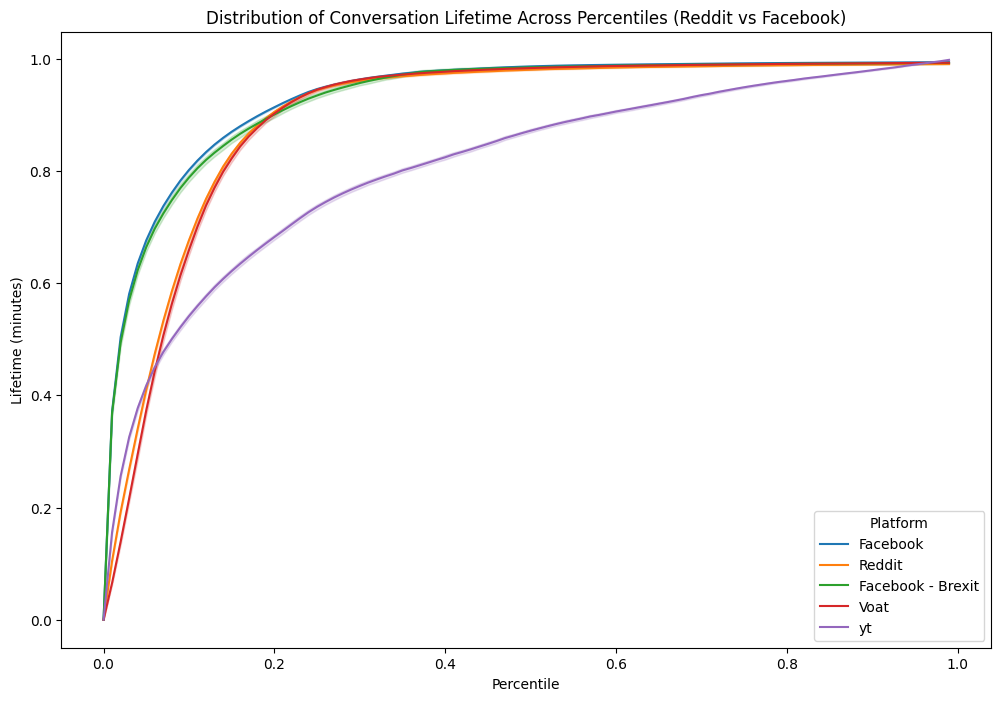

In [ ]:
df=combined_results
plot_ECDF(df,level=95)

In [ ]:
number_of_usersfb.groupby(['post_id'])['user_id'].nunique()

## Parameter's Choice

### T0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Shape parameter (a): 0.3844295492882861
Shape parameter (b): 294.47288219865607
Location parameter: 0.0009999999999999998
Scale parameter: 33.07578198818712


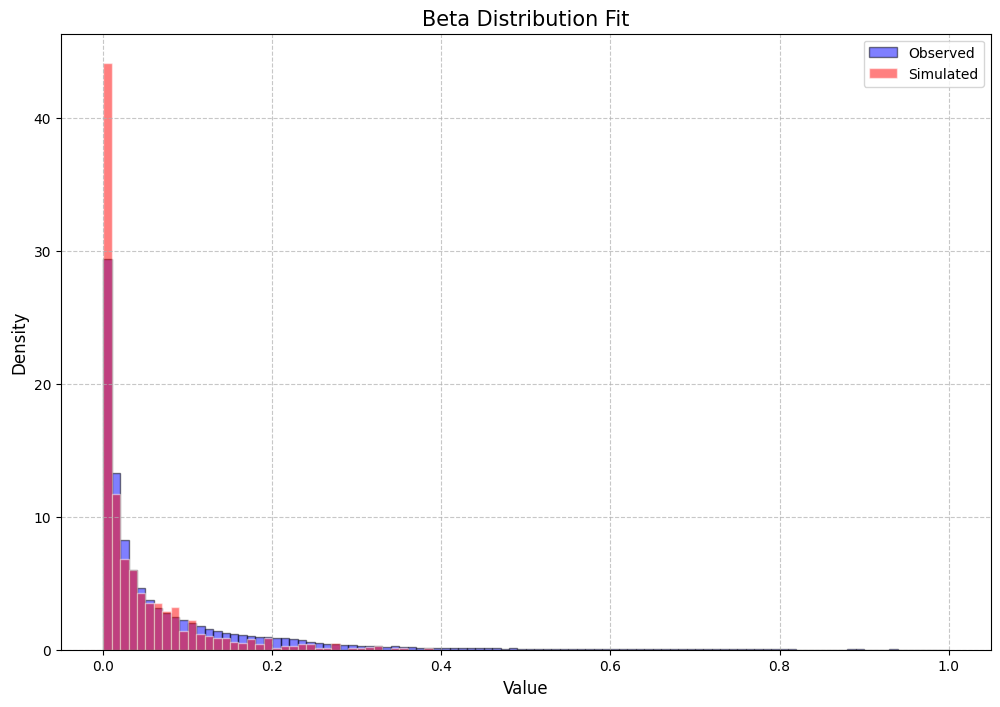

In [158]:
# Filter out zero or negative values

'''fb['year']=pd.to_datetime(rd['thread_birth']).dt.year
rd['year'].unique()
data = rd[rd['year']==2022]['temporal_distance_birth_base_100h']'''

social=fb
data = social[social['sequential_number_of_comment_by_user_in_thread']==1]['temporal_distance_birth_base_100h']
data = data[data > 0]
a, b, loc, scale = beta.fit(data)  # floc=0, fscale=1 fissa i parametri di posizione e scala
simulated = beta.rvs(a, b, loc=loc, scale=scale, size=1000)
print("Shape parameter (a):", a)
print("Shape parameter (b):", b)
print("Location parameter:", loc)
print("Scale parameter:", scale)

# Plot histogram
plt.figure(figsize=(12, 8))
bins = np.linspace(0, 1, 101)
plt.hist(data, bins, alpha=0.5, label='Observed', color='blue', density=True, edgecolor='black')


plt.hist(simulated, bins, alpha=0.5, label='Simulated', color='red', density=True, edgecolor='white')


# Labels, title, legend, etc.
plt.title('Beta Distribution Fit', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



#### Observed data from different platforms

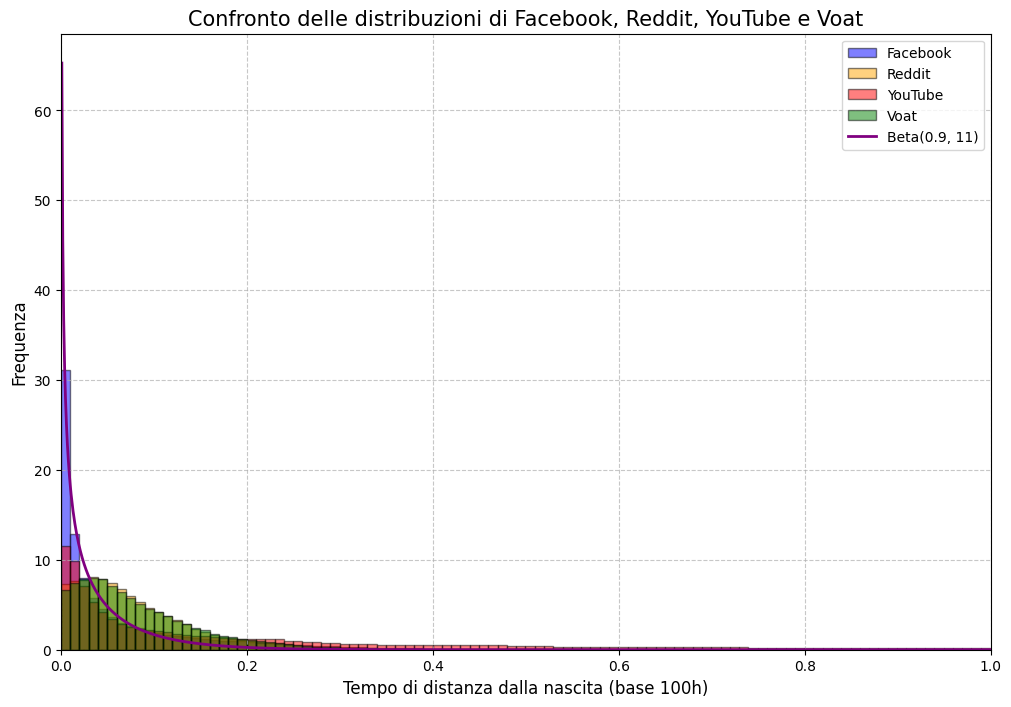

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Assume fb, rd, yt, vo are already defined dataframes with the required data columns

plt.figure(figsize=(12, 8))

# Plot histograms for the different distributions
plt.hist(fb['temporal_distance_birth_base_100h'], bins=100, alpha=0.5, label='Facebook', color='blue', density=True, edgecolor='black')

# Generate the beta distribution with parameters alpha=0.9 and beta=11
x = np.linspace(0, 1, 1000)
beta_dist = beta.pdf(x, 0.5, 14)

# Plot the beta distribution
plt.plot(x, beta_dist, label='Beta(0.9, 11)', color='purple', linewidth=2)

# Add titles and labels
plt.title('Confronto delle distribuzioni di Facebook, Reddit, YouTube e Voat', fontsize=15)
plt.xlabel('Tempo di distanza dalla nascita (base 100h)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Teoretical distributions

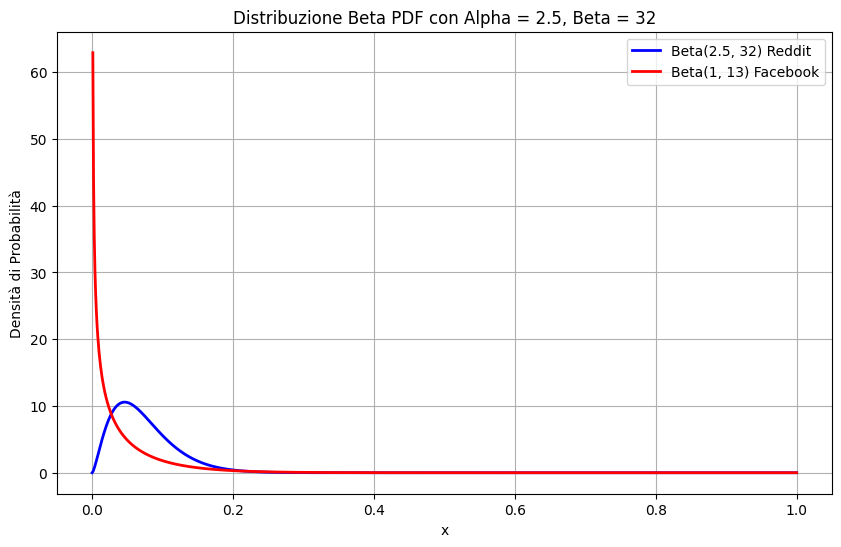

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parametri della distribuzione beta
alpha = 2.5
beta_param = 32

# Generiamo una griglia di valori x per il plot
x = np.linspace(0, 1, 1000)

# Calcoliamo la densità di probabilità (PDF) della distribuzione beta
pdf_beta = beta.pdf(x, alpha, beta_param)
pdf_beta2 = beta.pdf(x, 0.5, 13)

# Plot della distribuzione beta
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_beta, 'b-', lw=2, label=f'Beta({alpha}, {beta_param}) Reddit')
plt.plot(x, pdf_beta2, 'r-', lw=2, label=f'Beta({1}, {13}) Facebook')
plt.title(f'Distribuzione Beta PDF con Alpha = {alpha}, Beta = {beta_param}')
plt.xlabel('x')
plt.ylabel('Densità di Probabilità')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### ZIP

In [142]:
# Calculate the size of interaction for each platform
yt_size_of_interaction = yt.groupby(['user', 'post_id'])['comment_id'].count().reset_index()
fb_size_of_interaction = fb.groupby(['user_id', 'post_id'])['comment_id'].count().reset_index()
rd_size_of_interaction = rd.groupby(['user_id', 'post_id'])['comment_code'].count().reset_index()
vo_size_of_interaction = vo.groupby(['user', 'root_submission'])['comment_id'].count().reset_index()

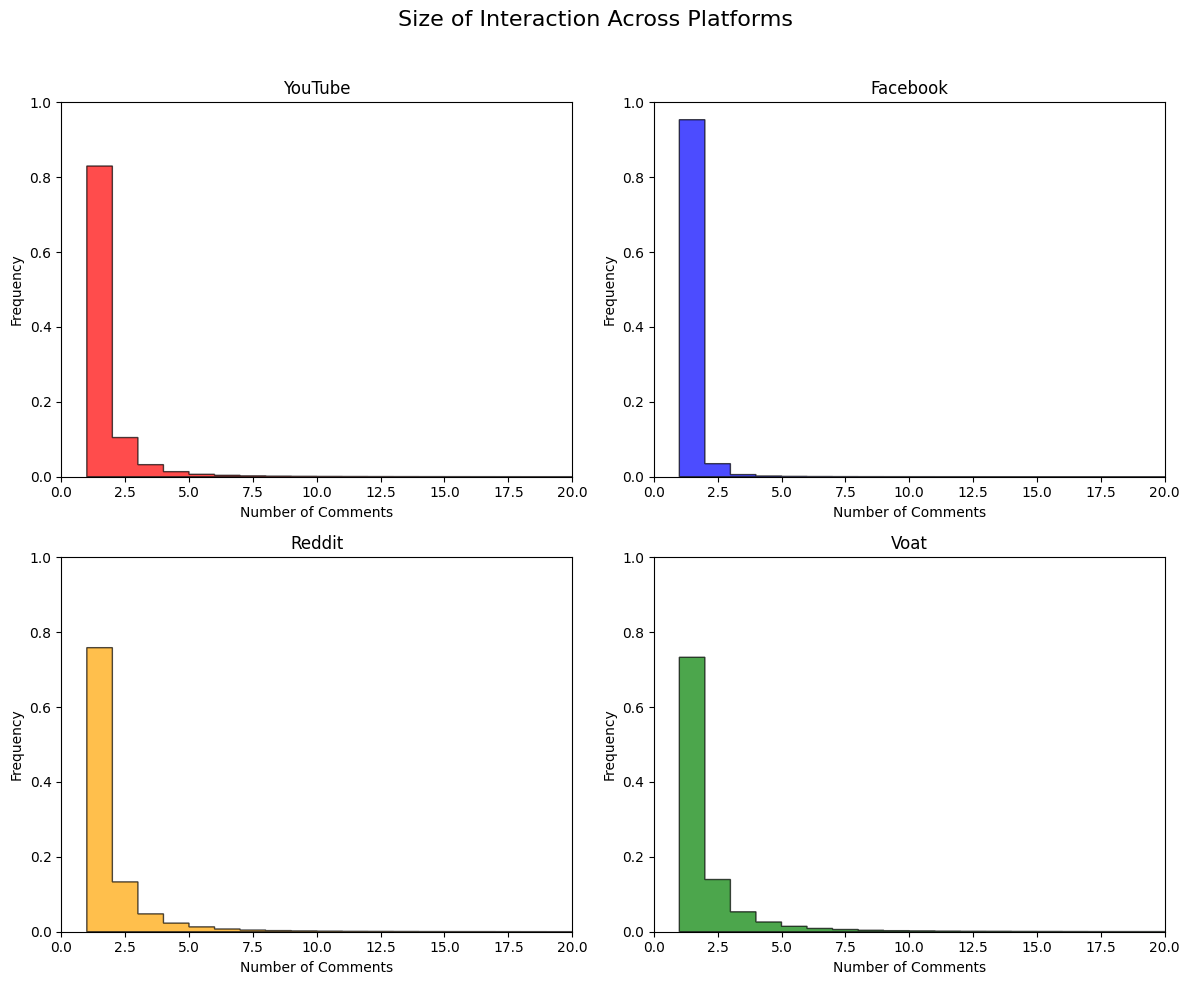

In [ ]:
bins = np.arange(1, 1000)

# Creare subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# YouTube
axs[0, 0].hist(yt_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='red', histtype='stepfilled', density=True)
axs[0, 0].set_title('YouTube')
axs[0, 0].set_xlim(0, 20)
axs[0, 0].set_xlabel('Number of Comments')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_ylim(0, 1)

# Facebook
axs[0, 1].hist(fb_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='blue', histtype='stepfilled', density=True)
axs[0, 1].set_title('Facebook')
axs[0, 1].set_xlabel('Number of Comments')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(0, 20)
axs[0, 1].set_ylim(0, 1)

# Reddit
axs[1, 0].hist(rd_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='orange', histtype='stepfilled', density=True)
axs[1, 0].set_title('Reddit')
axs[1, 0].set_xlim(0, 20)
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_xlabel('Number of Comments')
axs[1, 0].set_ylabel('Frequency')

# Voat
axs[1, 1].hist(vo_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='green', histtype='stepfilled', density=True)
axs[1, 1].set_title('Voat')
axs[1, 1].set_xlim(0, 20)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_xlabel('Number of Comments')
axs[1, 1].set_ylabel('Frequency')

# Titolo principale e layout
fig.suptitle('Size of Interaction Across Platforms', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

100%|██████████| 60/60 [00:01<00:00, 50.94it/s]


Best Alpha: 0.42105263157894735
Best Lambda: 0.9500000000000001
Best Loss: 640557.5882352941


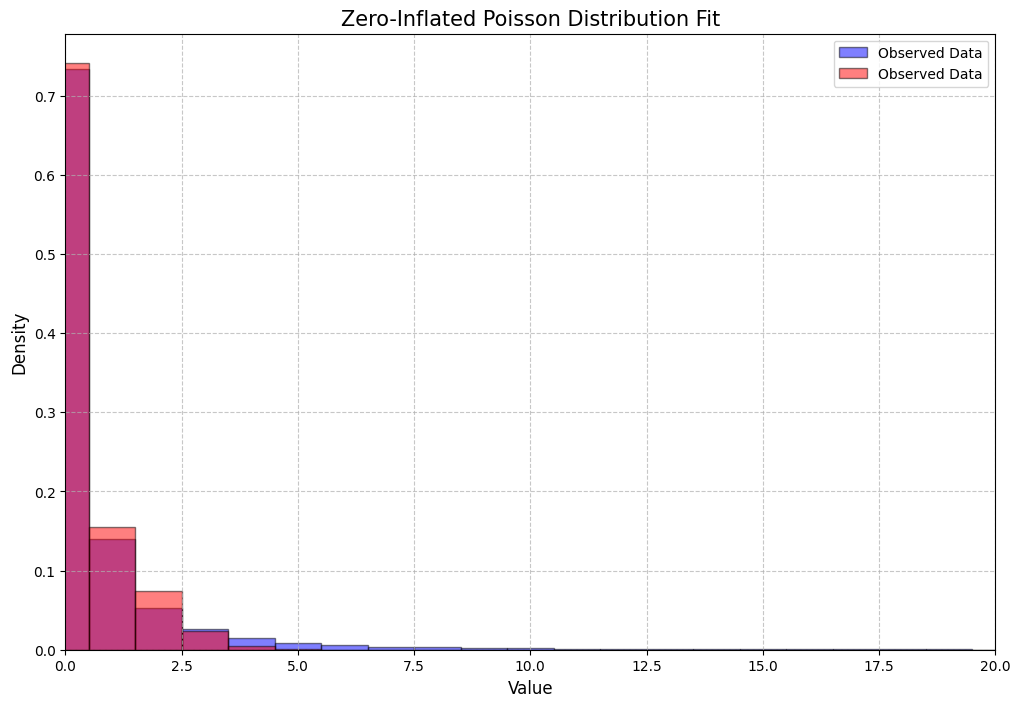

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from statsmodels.discrete.count_model import ZeroInflatedPoisson
from sklearn.metrics import mean_squared_error

# Example observed data (replace with your actual data loading)
observed_data =vo_size_of_interaction['comment_id']-1
observed_data=observed_data[observed_data<100]
# Function to simulate data from ZIP model
def simulate_zip(alpha, lambda_, size=10000):
    # Simulate inflation component
    inflate = np.random.binomial(1, alpha, size)
    # Simulate count component (Poisson distribution)
    counts = np.random.poisson(lambda_, size)
    # Combine inflated and counts
    simulated_data = inflate * counts
    return simulated_data

# Grid search parameters
alpha_range = np.linspace(0, 1, 20)  # Range of alpha values to try
lambda_range = np.arange(0,  3, 0.05)  # Range of lambda values to try

best_alpha = None
best_lambda = None
best_loss = np.inf

# Perform grid search
for alpha in (alpha_range):
    for lambda_ in tqdm(lambda_range):
        # Simulate data based on current parameters
        simulated_data = simulate_zip(alpha, lambda_, size=len(observed_data))

        # Compute observed and simulated counts up to the maximum observed value
        max_value = max(np.max(observed_data), np.max(simulated_data))
        observed_counts = np.bincount(observed_data, minlength=max_value + 1)
        simulated_counts = np.bincount(simulated_data, minlength=max_value + 1)

        # Compute loss (mean squared error between observed and simulated frequencies)
        loss = mean_squared_error(observed_counts, simulated_counts)

        # Check if current parameters give a better fit
        if loss < best_loss:
            best_loss = loss
            best_alpha = alpha
            best_lambda = lambda_

print(f"Best Alpha: {best_alpha}")
print(f"Best Lambda: {best_lambda}")
print(f"Best Loss: {best_loss}")


plt.figure(figsize=(12, 8))

# Plot observed data
plt.hist(observed_data, bins=np.arange(-0.5, np.max(observed_data) + 1.5, 1), alpha=0.5, label='Observed Data', color='blue', density=True, edgecolor='black')

# Plot fitted zero-inflated Poisson distribution
x = np.arange(0, np.max(observed_data) + 1)
simulated_data=simulate_zip(best_alpha, best_lambda, size=len(observed_data))
plt.hist(simulated_data, bins=np.arange(-0.5, np.max(observed_data) + 1.5, 1), alpha=0.5, label='Observed Data', color='red', density=True, edgecolor='black')
from scipy.stats import zipf

# Labels, title, legend, etc.
plt.title('Zero-Inflated Poisson Distribution Fit', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0,20)
plt.show()


### IAT

In [17]:
import pandas as pd

def process_platform(df, platform_name):
    # Create DataFrames for second and third comments
    df_2 = df[df['sequential_number_of_comment_by_user_in_thread'] == 1][['user_id', 'post_id', 'temporal_distance_birth_base_100h']]
    df_3 = df[df['sequential_number_of_comment_by_user_in_thread'] == 2][['user_id', 'post_id', 'temporal_distance_birth_base_100h']]

    # Rename columns for clarity
    df_2 = df_2.rename(columns={'temporal_distance_birth_base_100h': 'arrival_time_2'})
    df_3 = df_3.rename(columns={'temporal_distance_birth_base_100h': 'arrival_time_3'})

    # Merge the DataFrames on user_id and post_id
    merged_df = pd.merge(df_2, df_3, on=['user_id', 'post_id'])

    # Calculate the time difference
    merged_df['time_difference'] = merged_df['arrival_time_3'] - merged_df['arrival_time_2']

    # Display the merged DataFrame
    print(f"Merged DataFrame for {platform_name}:")
    print(merged_df.head(), "\n")

    return merged_df

# Process Facebook
merged_fb = process_platform(fb, 'Facebook')

# Process Reddit
merged_rd = process_platform(rd, 'Reddit')

# Process YouTube
yt['user_id']=yt['user']
merged_yt = process_platform(yt, 'YouTube')

# Process Voat
vo['user_id']=vo['user']
vo['post_id']=vo['root_submission']
merged_vo = process_platform(vo, 'Voat')



Merged DataFrame for Facebook:
             user_id                          post_id  arrival_time_2  \
0  10207259087090249  101911273177707_944798945555598           0.006   
1  10201565261650010  101911273177707_944798945555598           0.007   
2   1606482633009855  101911273177707_944798945555598           0.024   
3  10208517029341252  101911273177707_944798945555598           0.131   
4    865911960198782  101911273177707_944798945555598           0.161   

   arrival_time_3  time_difference  
0           0.006            0.000  
1           0.039            0.032  
2           0.024            0.000  
3           0.236            0.105  
4           0.162            0.001   

Merged DataFrame for Reddit:
    user_id post_id  arrival_time_2  arrival_time_3  time_difference
0  t2_9fnae  7nbyx3           0.000           0.066            0.066
1  t2_gfu9w  7nbyx3           0.004           0.014            0.010
2  t2_x8ut7  7nbyx3           0.007           0.108            0.101
3

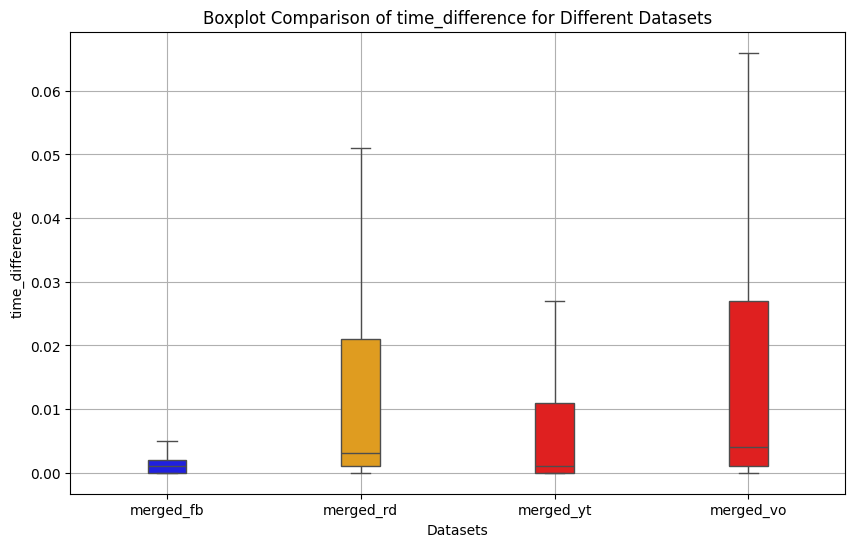

0.004

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded correctly into DataFrames: merged_fb, merged_vo, merged_rd, merged_yt
# Each DataFrame has a column 'time_difference'

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Adjust the positions for each boxplot
positions = [0,1, 2,3]  # Adjust these positions as needed

# Boxplot for merged_fb
sns.boxplot(x=positions[0], y='time_difference', data=merged_fb, color='blue', width=0.2,showfliers=False)

# Boxplot for merged_rd
sns.boxplot(x=positions[1], y='time_difference', data=merged_rd, color='orange', width=0.2,showfliers=False)

# Boxplot for merged_yt
sns.boxplot(x=positions[2], y='time_difference', data=merged_yt, color='red', width=0.2,showfliers=False)

# Boxplot for merged_yt
sns.boxplot(x=positions[3], y='time_difference', data=merged_vo, color='red', width=0.2,showfliers=False)

# Customizing the appearance of the plot
plt.title('Boxplot Comparison of time_difference for Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('time_difference')
plt.xticks(positions, ['merged_fb', 'merged_rd', 'merged_yt', 'merged_vo'])  # Assign labels to positions
plt.grid(True)

# Show the plot
plt.show()

merged_fb['time_difference'].median()

merged_rd['time_difference'].median()

merged_yt['time_difference'].median()

merged_vo['time_difference'].median()



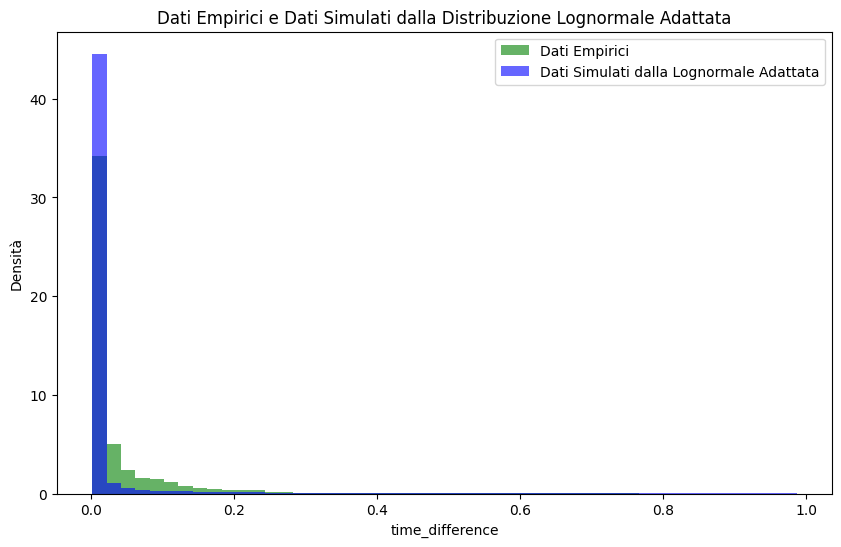

Lognorm Fit - shape: 14.256816294126988, loc: 0.0009999999999998896, scale: 3.278724567659893e-06


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# Supponiamo che 'merged_rd' sia il DataFrame e 'time_difference' la colonna contenente i dati osservati

# Step 1: Normalizzare i dati (come hai fatto prima)
data = merged_rd['time_difference']
data = data[data > 0]  # Rimuovere i valori non positivi
data_min = data.min()
data_max = data.max()

# Step 2: Adattare una distribuzione lognormale ai dati normalizzati
shape, loc, scale = lognorm.fit(data)

# Step 3: Generare dati sintetici dalla distribuzione lognormale adattata
synthetic_data_normalized = lognorm.rvs(shape, loc=loc, scale=scale, size=len(data))

# Step 4: Tracciare gli istogrammi con gli stessi bin
plt.figure(figsize=(10, 6))
# Definire i bin basati sull'intervallo dei dati empirici
bins = np.linspace(data_min, data_max, 50)
# Istogramma dei dati empirici
plt.hist(data, bins=bins, density=True, alpha=0.6, color='g', label='Dati Empirici')
# Istogramma dei dati simulati
plt.hist(synthetic_data, bins=bins, density=True, alpha=0.6, color='b', label='Dati Simulati dalla Lognormale Adattata')

# Configurazioni del grafico
plt.title('Dati Empirici e Dati Simulati dalla Distribuzione Lognormale Adattata')
plt.xlabel('time_difference')
plt.ylabel('Densità')
plt.legend()
plt.show()

# Stampare i parametri stimati
print(f"Lognorm Fit - shape: {shape}, loc: {loc}, scale: {scale}")


In [218]:
import pandas as pd

# Supponiamo che i tuoi dataframe siano già caricati come merged_fb, merged_rd, merged_yt, merged_vo

# Calcola la media
mean_fb = merged_fb['time_difference'].mean()
mean_rd = merged_rd['time_difference'].mean()
mean_yt = merged_yt['time_difference'].mean()
mean_vo = merged_vo['time_difference'].mean()

# Calcola la mediana
median_fb = merged_fb['time_difference'].median()
median_rd = merged_rd['time_difference'].median()
median_yt = merged_yt['time_difference'].median()
median_vo = merged_vo['time_difference'].median()

# Calcola la deviazione standard
std_fb = merged_fb['time_difference'].std()
std_rd = merged_rd['time_difference'].std()
std_yt = merged_yt['time_difference'].std()
std_vo = merged_vo['time_difference'].std()

# Calcola i quartili
quantiles_fb = merged_fb['time_difference'].quantile([0.25, 0.5, 0.75])
quantiles_rd = merged_rd['time_difference'].quantile([0.25, 0.5, 0.75])
quantiles_yt = merged_yt['time_difference'].quantile([0.25, 0.5, 0.75])
quantiles_vo = merged_vo['time_difference'].quantile([0.25, 0.5, 0.75])

# Stampa i risultati
print(f"merged_fb - Mean: {mean_fb}, Median: {median_fb}, Std: {std_fb}, Quantiles: {quantiles_fb}")
print(f"merged_rd - Mean: {mean_rd}, Median: {median_rd}, Std: {std_rd}, Quantiles: {quantiles_rd}")
print(f"merged_yt - Mean: {mean_yt}, Median: {median_yt}, Std: {std_yt}, Quantiles: {quantiles_yt}")
print(f"merged_vo - Mean: {mean_vo}, Median: {median_vo}, Std: {std_vo}, Quantiles: {quantiles_vo}")


merged_fb - Mean: 0.012416525635068485, Median: 0.001, Std: 0.0555024690578548, Quantiles: 0.25    0.000
0.50    0.001
0.75    0.002
Name: time_difference, dtype: float64
merged_rd - Mean: 0.027696429783302095, Median: 0.002999999999999999, Std: 0.06866834559273492, Quantiles: 0.25    0.001
0.50    0.003
0.75    0.021
Name: time_difference, dtype: float64
merged_yt - Mean: 0.04050072739734889, Median: 0.0010000000000000009, Std: 0.11218596419496832, Quantiles: 0.25    0.000
0.50    0.001
0.75    0.011
Name: time_difference, dtype: float64
merged_vo - Mean: 0.03344287610693821, Median: 0.004, Std: 0.0788792712397315, Quantiles: 0.25    0.001
0.50    0.004
0.75    0.027
Name: time_difference, dtype: float64


In [219]:
import pandas as pd
from scipy.stats import expon, gamma
import numpy as np

# Supponiamo che i tuoi dataframe siano già caricati come merged_fb, merged_rd, merged_yt, merged_vo

# Esempio di dati (sostituisci questi con i tuoi dataframe reali)
merged_fb = pd.DataFrame({'time_difference': np.random.exponential(scale=0.012416525635068485, size=1000)})
merged_rd = pd.DataFrame({'time_difference': np.random.exponential(scale=0.027696429783302095, size=1000)})
merged_yt = pd.DataFrame({'time_difference': np.random.exponential(scale=0.04050072739734889, size=1000)})
merged_vo = pd.DataFrame({'time_difference': np.random.exponential(scale=0.03344287610693821, size=1000)})

# Funzione per stimare i parametri della distribuzione esponenziale
def estimate_exponential_params(data):
    loc, scale = expon.fit(data)
    return loc, scale

# Funzione per stimare i parametri della distribuzione gamma
def estimate_gamma_params(data):
    shape, loc, scale = gamma.fit(data)
    return shape, loc, scale

# Stima dei parametri per ciascun dataset
datasets = {'merged_fb': merged_fb, 'merged_rd': merged_rd, 'merged_yt': merged_yt, 'merged_vo': merged_vo}

for name, dataset in datasets.items():
    data = dataset['time_difference']

    exp_loc, exp_scale = estimate_exponential_params(data)
    gamma_shape, gamma_loc, gamma_scale = estimate_gamma_params(data)

    print(f"{name} - Exponential Params: loc={exp_loc}, scale={exp_scale}")
    print(f"{name} - Gamma Params: shape={gamma_shape}, loc={gamma_loc}, scale={gamma_scale}")


merged_fb - Exponential Params: loc=8.835165995862164e-06, scale=0.012045427695092864
merged_fb - Gamma Params: shape=0.9591420380757085, loc=8.835165995862163e-06, scale=0.012701402860629873
merged_rd - Exponential Params: loc=1.0168360383958703e-05, scale=0.027446522098529744
merged_rd - Gamma Params: shape=0.9663951135745219, loc=1.0168360383958701e-05, scale=0.028065929306776344
merged_yt - Exponential Params: loc=8.398574858687447e-05, scale=0.040776360347085545
merged_yt - Gamma Params: shape=1.0681351553853236, loc=8.006678007997027e-05, scale=0.03817934688451051
merged_vo - Exponential Params: loc=4.833397306382993e-05, scale=0.034706692367391816
merged_vo - Gamma Params: shape=0.2528353174445863, loc=4.8333973063829924e-05, scale=1.3185614633579419


## Manual simulation

### Parameters FB

In [159]:
n=100
a=0.3844295492882861
b= 294.47288219865607
loc=0.0009999999999999998
scale=33.07578198818712
alpha=0.1
lambda_=0.6
mu=0.001
sd=0.0001
k=1
simulated, observed=simulate_data(fbb, alpha, lambda_, mu, sd, a, b,loc, scale , k, num_threads=n)

100%|██████████| 100/100 [00:05<00:00, 19.50it/s]


In [160]:
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Observed'

reddit_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Reddit'





Processing DataFrame: 100%|██████████| 100/100 [00:04<00:00, 24.82it/s]


In [161]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 399.89
1.3797268705520291


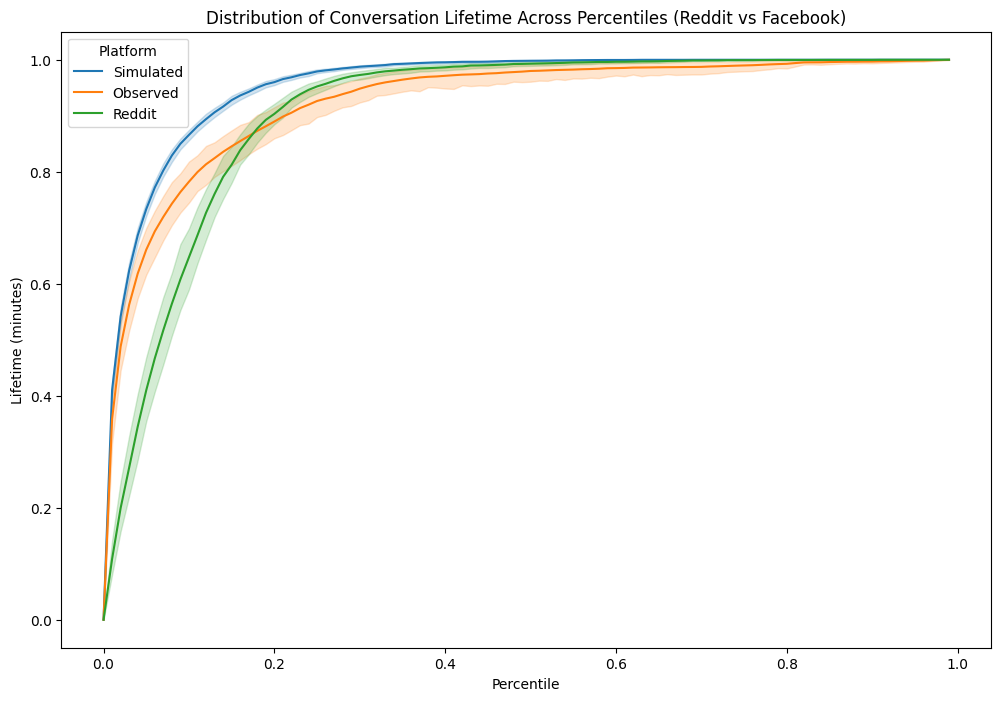

In [162]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF,reddit_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 0.8,20

### Parameters YT

In [146]:
n=100

a=0.5186615140672572
b=1.7898387515641103
loc=0.0009999999999999998
scale=1.110437329330408
alpha=0.3
lambda_=0.6
mu=0.001
sd=0.001
k=1.4
simulated, observed=simulate_data(yt, alpha, lambda_, mu, sd, a, b,loc, scale, k, num_threads=n)

100%|██████████| 100/100 [00:58<00:00,  1.70it/s]


In [149]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='YouTube'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:n])], time_intervals)
youtube_ECDF['Platform']='Reddit'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 100/100 [00:04<00:00, 24.61it/s]


In [150]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 1144.73
1.006776334953317


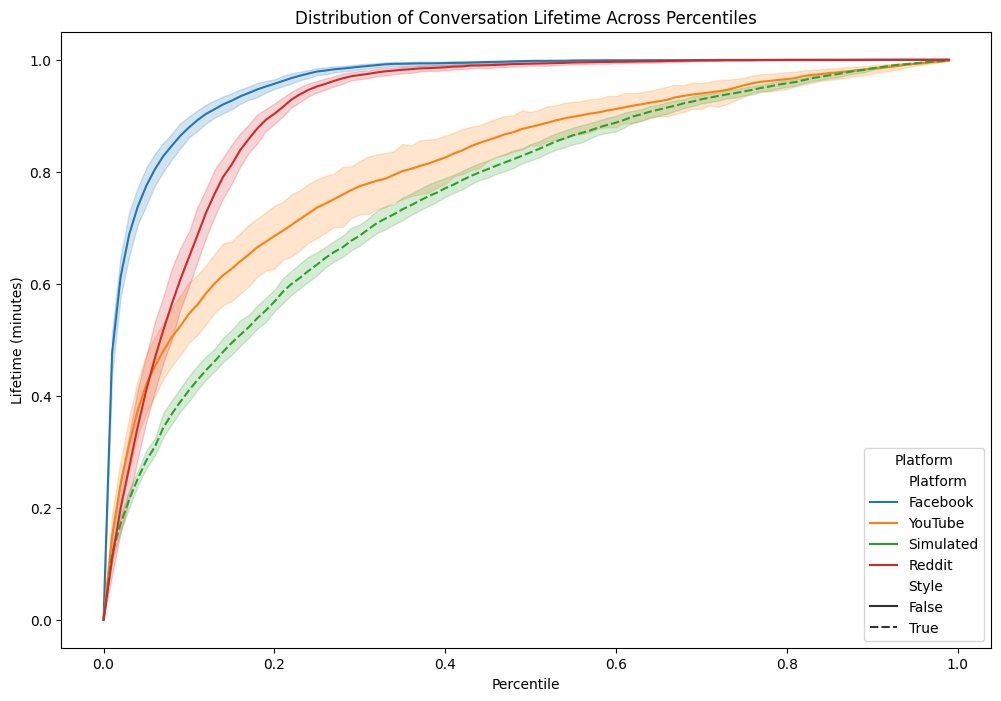

In [151]:

# Concatenate all ECDF data into one DataFrame
combined_results = pd.concat([reddit_ECDF, observed_ECDF, simulated_ECDF, youtube_ECDF], ignore_index=True)
combined_results['Style']=combined_results['Platform']=='Simulated'
# Plotting lineplot for all platforms with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_results, x='Time Grid Value', y='Share', hue='Platform',errorbar=('ci', 99), style='Style')
plt.title('Distribution of Conversation Lifetime Across Percentiles')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Parameters Vo

In [189]:
n=200

a=0.7683453768943135
b=181.35859916908146
loc=0.0009999999999999998
scale=10.849357267138616
alpha=0.4
lambda_=0.95
mu=0.01 #0.002
sd=0.001
k=0.6

simulated, observed=simulate_data(vo, alpha, lambda_, mu, sd, a, b,loc,scale, k, num_threads=n)

100%|██████████| 200/200 [00:01<00:00, 167.25it/s]


In [190]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Voat'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(yt[yt['post_id'].isin(yt['post_id'].unique()[0:n])], time_intervals)
youtube_ECDF['Platform']='YouTube'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 200/200 [00:07<00:00, 26.46it/s]


In [191]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 570.9
0.8656337478028774


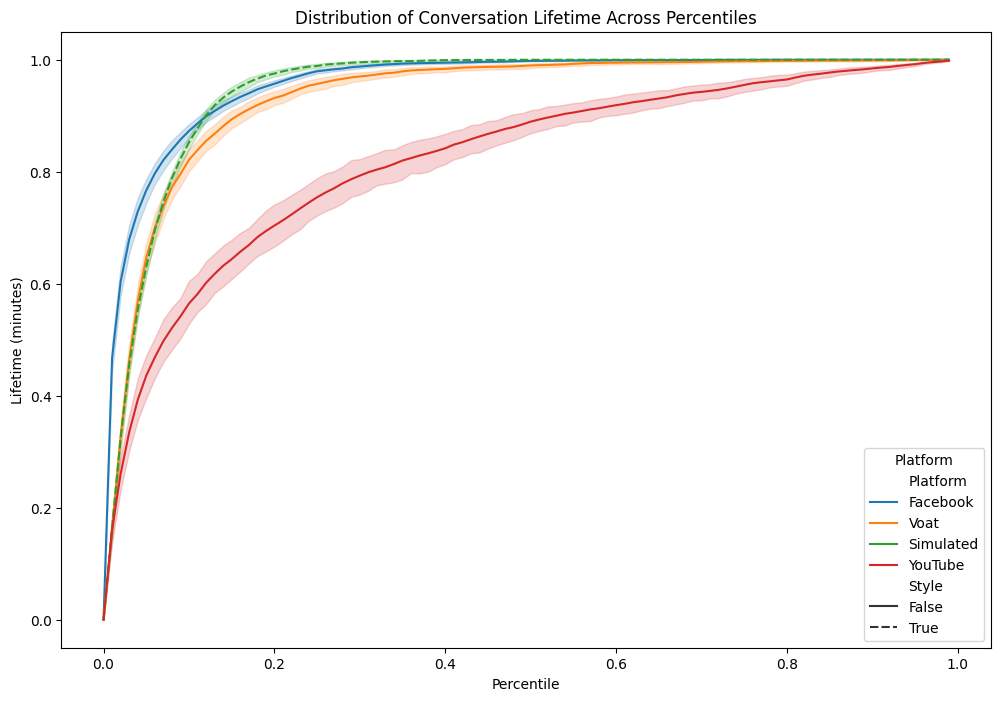

In [192]:

# Concatenate all ECDF data into one DataFrame
combined_results = pd.concat([reddit_ECDF, observed_ECDF, simulated_ECDF, youtube_ECDF], ignore_index=True)
combined_results['Style']=combined_results['Platform']=='Simulated'
# Plotting lineplot for all platforms with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_results, x='Time Grid Value', y='Share', hue='Platform',errorbar=('ci', 99), style='Style')
plt.title('Distribution of Conversation Lifetime Across Percentiles')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Parameters RD

In [115]:
n=20
a=1.3208418726992361
b=366274394.2558266
loc=0.00043188573340450587
scale=21377429.04281839
alpha=0.6
lambda_=0.6
mu=0.003
sd=0.001
k=1.2
simulated, observed=simulate_data(rd, alpha, lambda_, mu, sd, a, b,loc,scale, k, num_threads=n)

100%|██████████| 20/20 [00:06<00:00,  3.09it/s]


In [116]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Reddit'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(yt[yt['post_id'].isin(yt['post_id'].unique()[0:n])], time_intervals)
youtube_ECDF['Platform']='YouTube'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 20/20 [00:00<00:00, 32.39it/s]


In [117]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 85.37
0.7933758735946521


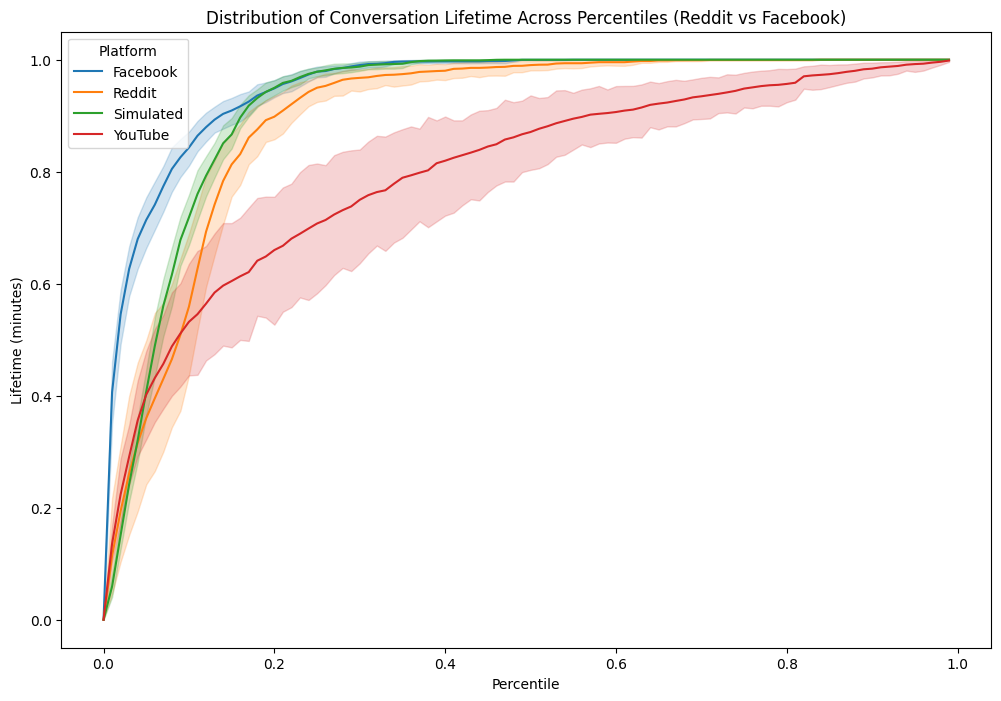

In [118]:
combined_results = pd.concat([reddit_ECDF, observed_ECDF,simulated_ECDF,youtube_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()


## Grid Search

In [19]:
import itertools
import pandas as pd

# Definisci i parametri per ciascuna piattaforma
facebook_params = [0.5, 11, 0.98, 4, 0.1, 0.005, 1.01]
reddit_params = [0.9, 13, 0.85, 5, 0.013, 0.01, 1.22]
youtube_params = [0.95, 12, 0.9, 4, 0.14, 0.03, 1.5]

# Metti insieme tutti i parametri
all_params = [facebook_params, reddit_params, youtube_params]


# Initialize an empty list to store results
results = []

# Time intervals (placeholder, da definire)
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali


# Loop over each parameter combination
for params in all_params:
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(fb, alpha, lambda_, mu, sd, a, b, k, num_threads=100)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))

# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])

print(results_df)


,a,b,alpha,lambda_,mu,sd,k,Error
0,0.50,11,0.98,4,0.100,0.005,1.01,319.061252
1,0.90,13,0.85,5,0.013,0.010,1.22,539.726110
2,0.95,12,0.90,4,0.140,0.030,1.50,1424.112921


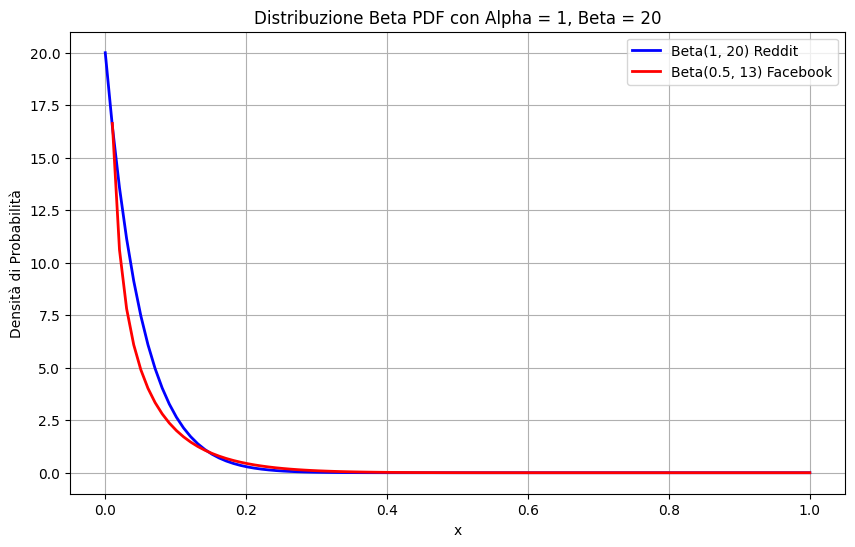

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parametri della distribuzione beta
alpha =1
beta_param = 20

# Generiamo una griglia di valori x per il plot
x = np.linspace(0, 1, 100)

# Calcoliamo la densità di probabilità (PDF) della distribuzione beta
pdf_beta = beta.pdf(x, alpha, beta_param)
pdf_beta2 = beta.pdf(x, 0.5, 11)

# Plot della distribuzione beta
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_beta, 'b-', lw=2, label=f'Beta({alpha}, {beta_param}) Reddit')
plt.plot(x, pdf_beta2, 'r-', lw=2, label=f'Beta({0.5}, {13}) Facebook')
plt.title(f'Distribuzione Beta PDF con Alpha = {alpha}, Beta = {beta_param}')
plt.xlabel('x')
plt.ylabel('Densità di Probabilità')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [15]:
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

# Define social
social = fb

# Define the grid of parameters
parameters = {
    'a': np.arange(0.5, 1.05, 0.2),
    'b': np.arange(10, 14, 1.2),
    'alpha': np.arange(0.8, 1.05, 0.1),
    'lambda_': 4,
    'mu': np.arange(0.1, 0.15, 0.03),
    'sd': np.arange(0.005, 0.03, 0.01),
    'k': np.arange(1, 1.6, 0.3)
}

# Initialize an empty list to store results
results = []
time_intervals = np.arange(0, 1, 0.1)  # Utilizzo di np.arange per intervalli decimali

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Define a function to process each combination
def process_combination(params):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(social, alpha, lambda_, mu, sd, a, b, k, num_threads=10, activate_tqdm=False)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals, activate_tqdm=False)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals, activate_tqdm=False)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Return results tuple
    return (*params, error)

# Use ProcessPoolExecutor for parallel processing
with ProcessPoolExecutor() as executor:
    results = list(tqdm(executor.map(process_combination, param_combinations), total=len(param_combinations)))

# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])

# Optional: Save results to a file
# results_df.to_csv('results.csv', index=False)


  0%|          | 4/1728 [00:26<3:13:16,  6.73s/it]


KeyboardInterrupt: 

In [82]:
import itertools

# Define social
social=rd

# Define the grid of parameters
parameters = {
    'a': [ 0.1,0.3,0.5,1,2,3],
    'b': [5,10,15, 20, 25,30,35],
    'alpha': [1,0.95,0.9,0.8,0.75],
    'lambda_': [1,4,8,13],
    'mu': [0.002],
    'sd': [0.001],
    'k': [1.0]
}

# Initialize an empty list to store results
results = []

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Loop over each parameter combination
for params in (param_combinations):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(social, alpha, lambda_, mu, sd, a, b, k, num_threads=10)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))


# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])




 50%|█████     | 5/10 [00:00<00:00,  6.61it/s]


KeyboardInterrupt: 

In [94]:
import itertools

# Define social
social=yt

# Define the grid of parameters
parameters = {
    'a': [ 0.1,0.3,0.5,0.7,1,2],
    'b': [5,7,15, 20,25,30],
    'alpha': [0.7],
    'lambda_': [4],
    'mu': [0.02],
    'sd': [0.001],
    'k': [1.0]
}

# Initialize an empty list to store results
results = []

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Loop over each parameter combination
for params in (param_combinations):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(social, alpha, lambda_, mu, sd, a, b, k, num_threads=5)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))


# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])




,a,b,alpha,lambda_,mu,sd,k,Error
0,0.1,5,0.7,4,0.02,0.001,1.0,65.303787
1,0.1,7,0.7,4,0.02,0.001,1.0,67.229143
2,0.1,15,0.7,4,0.02,0.001,1.0,70.231330
3,0.1,20,0.7,4,0.02,0.001,1.0,70.314775
4,0.1,25,0.7,4,0.02,0.001,1.0,72.431185
5,0.1,30,0.7,4,0.02,0.001,1.0,71.795799
6,0.3,5,0.7,4,0.02,0.001,1.0,47.800080
7,0.3,7,0.7,4,0.02,0.001,1.0,56.481084
8,0.3,15,0.7,4,0.02,0.001,1.0,64.180301
9,0.3,20,0.7,4,0.02,0.001,1.0,67.621112
